# Calling the Dataset and Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
cf = pd.read_csv("V-Dem-CY-Full+Others-v14.csv")
cf.head()

<ipython-input-1-bcbfe6fb2b80>:3: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  cf = pd.read_csv("V-Dem-CY-Full+Others-v14.csv")


country_name country_text_id  country_id  year historical_date  project  \
0       Mexico             MEX           3  1789      1789-12-31        1   
1       Mexico             MEX           3  1790      1790-12-31        1   
2       Mexico             MEX           3  1791      1791-12-31        1   
3       Mexico             MEX           3  1792      1792-12-31        1   
4       Mexico             MEX           3  1793      1793-12-31        1   

   historical                  histname  codingstart  codingend  ...  \
0           1  Viceroyalty of New Spain         1789       2023  ...   
1           1  Viceroyalty of New Spain         1789       2023  ...   
2           1  Viceroyalty of New Spain         1789       2023  ...   
3           1  Viceroyalty of New Spain         1789       2023  ...   
4           1  Viceroyalty of New Spain         1789       2023  ...   

   e_mipopula  e_miurbani  e_pefeliex  e_wb_pop  e_pechmor  e_miinteco  \
0         NaN         NaN         NaN       NaN        NaN         0.0   
1         NaN         NaN         NaN       NaN        NaN         0.0   
2         NaN         NaN         NaN       NaN        NaN         0.0   
3         NaN         NaN         NaN       NaN        NaN         0.0   
4         NaN         NaN         NaN       NaN        NaN         0.0   

   e_civil_war  e_miinterc  e_pt_coup  e_pt_coup_attempts  
0          NaN         0.0        NaN                 NaN  
1          NaN         0.0        NaN                 NaN  
2          NaN         0.0        NaN                 NaN  
3          NaN         0.0        NaN                 NaN  
4          NaN         0.0        NaN                 NaN  

[5 rows x 4607 columns]

Removes all countries with no data from 2023, meaning that they no longer exist as countries.

In [ ]:
excluded_ids = [349, 350, 363, 137, 362, 357, 359, 358, 360, 351, 366, 364, 209, 361, 352, 373, 35, 365, 353, 23, 354, 356, 355]

filtered_cf = cf[~cf['country_id'].isin(excluded_ids)]
#this chunk filters out all countries with the above ID numbers. these numbers correspond to
#countries that are not countries today. Highlights include Hesse-Darmstadt (359) and Bavaria (350)

Removes all Useless Variables with names that can be confused for other important variables.


In [ ]:
Useless = ['histname','country_text_id', 'historical_date', 'project', 'historical','codingstart', 'codingstart_contemp', 'codingstart_hist','gap_index', 'codingend', 'codingend_contemp', 'codingend_hist', 'gapstart1','gapstart2','gapstart3','gapend1','gapend2','gapend3']
df = filtered_cf.drop(columns=Useless, axis=1)

# Regimes of the World

Creates a new column for regions rather than working with the 179 countries in the dataset directly.

In [ ]:
region_map = {'Belgium': 'North America & Western Europe',
    'Canada': 'North America & Western Europe',
    'Costa Rica': 'North America & Western Europe',
    'Croatia': 'North America & Western Europe',
    'Cyprus': 'North America & Western Europe',
    'Czechia': 'North America & Western Europe',
    'Denmark': 'North America & Western Europe',
    'Dominican Republic': 'North America & Western Europe',
    'El Salvador': 'North America & Western Europe',
    'Finland': 'North America & Western Europe',
    'France': 'North America & Western Europe',
    'Germany': 'North America & Western Europe',
    'Greece': 'North America & Western Europe',
    'Honduras': 'North America & Western Europe',
    'Iceland': 'North America & Western Europe',
    'Ireland': 'North America & Western Europe',
    'Israel': 'North America & Western Europe',
    'Italy': 'North America & Western Europe',
    'Jamaica': 'North America & Western Europe',
    'Luxembourg': 'North America & Western Europe',
    'Malta': 'North America & Western Europe',
    'Netherlands': 'North America & Western Europe',
    'Norway': 'North America & Western Europe',
    'Panama': 'North America & Western Europe',
    'Portugal': 'North America & Western Europe',
    'Spain': 'North America & Western Europe',
    'Sweden': 'North America & Western Europe',
    'Switzerland': 'North America & Western Europe',
    'United Kingdom': 'North America & Western Europe',
    'United States of America': 'North America & Western Europe',
    'Uruguay': 'North America & Western Europe',
    'Armenia': 'Eastern Europe & Central Asia',
    'Azerbaijan': 'Eastern Europe & Central Asia',
    'Belarus': 'Eastern Europe & Central Asia',
    'Bosnia and Herzegovina': 'Eastern Europe & Central Asia',
    'Bulgaria': 'Eastern Europe & Central Asia',
    'Estonia': 'Eastern Europe & Central Asia',
    'Georgia': 'Eastern Europe & Central Asia',
    'Hungary': 'Eastern Europe & Central Asia',
    'Kazakhstan': 'Eastern Europe & Central Asia',
    'Kosovo': 'Eastern Europe & Central Asia',
    'Kyrgyzstan': 'Eastern Europe & Central Asia',
    'Latvia': 'Eastern Europe & Central Asia',
    'Lithuania': 'Eastern Europe & Central Asia',
    'Moldova': 'Eastern Europe & Central Asia',
    'Montenegro': 'Eastern Europe & Central Asia',
    'North Macedonia': 'Eastern Europe & Central Asia',
    'Poland': 'Eastern Europe & Central Asia',
    'Romania': 'Eastern Europe & Central Asia',
    'Russia': 'Eastern Europe & Central Asia',
    'Serbia': 'Eastern Europe & Central Asia',
    'Slovakia': 'Eastern Europe & Central Asia',
    'Slovenia': 'Eastern Europe & Central Asia',
    'Tajikistan': 'Eastern Europe & Central Asia',
    'Turkmenistan': 'Eastern Europe & Central Asia',
    'Ukraine': 'Eastern Europe & Central Asia',
    'Uzbekistan': 'Eastern Europe & Central Asia',
    'Argentina': 'Latin America & Caribbean',
    'Barbados': 'Latin America & Caribbean',
    'Bolivia': 'Latin America & Caribbean',
    'Brazil': 'Latin America & Caribbean',
    'Chile': 'Latin America & Caribbean',
    'Colombia': 'Latin America & Caribbean',
    'Cuba': 'Latin America & Caribbean',
    'Ecuador': 'Latin America & Caribbean',
    'Guatemala': 'Latin America & Caribbean',
    'Guyana': 'Latin America & Caribbean',
    'Haiti': 'Latin America & Caribbean',
    'Mexico': 'Latin America & Caribbean',
    'Nicaragua': 'Latin America & Caribbean',
    'Paraguay': 'Latin America & Caribbean',
    'Peru': 'Latin America & Caribbean',
    'Trinidad and Tobago': 'Latin America & Caribbean',
    'Venezuela': 'Latin America & Caribbean',
    'Angola': 'Sub-Saharan Africa',
    'Benin': 'Sub-Saharan Africa',
    'Botswana': 'Sub-Saharan Africa',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Burundi': 'Sub-Saharan Africa',
    'Cameroon': 'Sub-Saharan Africa',
    'Cape Verde': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa',
    'Chad': 'Sub-Saharan Africa',
    'Comoros': 'Sub-Saharan Africa',
    'Democratic Republic of the Congo': 'Sub-Saharan Africa',
    'Djibouti': 'Sub-Saharan Africa',
    'Equatorial Guinea': 'Sub-Saharan Africa',
    'Eritrea': 'Sub-Saharan Africa',
    'Eswatini': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'Gabon': 'Sub-Saharan Africa',
    'Ghana': 'Sub-Saharan Africa',
    'Guinea': 'Sub-Saharan Africa',
    'Guinea-Bissau': 'Sub-Saharan Africa',
    'Ivory Coast': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Mali': 'Sub-Saharan Africa',
    'Mauritania': 'Sub-Saharan Africa',
    'Mauritius': 'Sub-Saharan Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    'Niger': 'Sub-Saharan Africa',
    'Nigeria': 'Sub-Saharan Africa',
    'Republic of the Congo': 'Sub-Saharan Africa',
    'Rwanda': 'Sub-Saharan Africa',
    'Sao Tome and Principe': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa',
    'Seychelles': 'Sub-Saharan Africa',
    'Sierra Leone': 'Sub-Saharan Africa',
    'Somalia': 'Sub-Saharan Africa',
    'Somaliland': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Tanzania': 'Sub-Saharan Africa',
    'The Gambia': 'Sub-Saharan Africa',
    'Togo': 'Sub-Saharan Africa',
    'Uganda': 'Sub-Saharan Africa',
    'Zambia': 'Sub-Saharan Africa',
    'Zanzibar': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa',
    'Algeria': 'Middle East & North Africa',
    'Bahrain': 'Middle East & North Africa',
    'Egypt': 'Middle East & North Africa',
    'Iran': 'Middle East & North Africa',
    'Iraq': 'Middle East & North Africa',
    'Jordan': 'Middle East & North Africa',
    'Kuwait': 'Middle East & North Africa',
    'Lebanon': 'Middle East & North Africa',
    'Libya': 'Middle East & North Africa',
    'Morocco': 'Middle East & North Africa',
    'Oman': 'Middle East & North Africa',
    'Palestine/Gaza': 'Middle East & North Africa',
    'Palestine/West Bank': 'Middle East & North Africa',
    'Qatar': 'Middle East & North Africa',
    'Saudi Arabia': 'Middle East & North Africa',
    'Syria': 'Middle East & North Africa',
    'Tunisia': 'Middle East & North Africa',
    'Türkiye': 'Middle East & North Africa',
    'United Arab Emirates': 'Middle East & North Africa',
    'Yemen': 'Middle East & North Africa',
    'Afghanistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Bhutan': 'South Asia',
    'India': 'South Asia',
    'Maldives': 'South Asia',
    'Nepal': 'South Asia',
    'Pakistan': 'South Asia',
    'Sri Lanka': 'South Asia',
    'China': 'East Asia',
    'Japan': 'East Asia',
    'Mongolia': 'East Asia',
    'North Korea': 'East Asia',
    'South Korea': 'East Asia',
    'Taiwan': 'East Asia',
    'Australia': 'Southeast Asia & Oceania',
    'Brunei': 'Southeast Asia & Oceania',
    'Fiji': 'Southeast Asia & Oceania',
    'Indonesia': 'Southeast Asia & Oceania',
    'Malaysia': 'Southeast Asia & Oceania',
    'Myanmar': 'Southeast Asia & Oceania',
    'New Zealand': 'Southeast Asia & Oceania',
    'Papua New Guinea': 'Southeast Asia & Oceania',
    'Philippines': 'Southeast Asia & Oceania',
    'Singapore': 'Southeast Asia & Oceania',
    'Solomon Islands': 'Southeast Asia & Oceania',
    'Timor-Leste': 'Southeast Asia & Oceania',
    'Thailand': 'Southeast Asia & Oceania',
    'Vanuatu': 'Southeast Asia & Oceania',
    'Vietnam': 'Southeast Asia & Oceania',
    'Suriname' : 'Latin America & Caribbean',
    'Burma/Myanmar' : 'Southeast Asia & Oceania',
    'Albania' : 'Eastern Europe & Central Asia',
    'South Sudan' : 'Sub-Saharan Africa',
    'Cambodia' : 'Southeast Asia & Oceania',
    'Laos' : 'Southeast Asia & Oceania',
    'Austria' : 'North America & Western Europe',
    'Hong Kong' : 'East Asia'
}
df['region'] = df['country_name'].map(region_map)
#.map command was found here: https://stackoverflow.com/questions/29794959/pandas-add-new-column-to-dataframe-from-dictionary
df.head()

country_name  country_id  year  COWcode  v2x_polyarchy  \
0       Mexico           3  1789     70.0          0.028   
1       Mexico           3  1790     70.0          0.028   
2       Mexico           3  1791     70.0          0.028   
3       Mexico           3  1792     70.0          0.028   
4       Mexico           3  1793     70.0          0.028   

   v2x_polyarchy_codelow  v2x_polyarchy_codehigh  v2x_polyarchy_sd  \
0                  0.017                   0.037             0.011   
1                  0.017                   0.037             0.011   
2                  0.017                   0.037             0.011   
3                  0.017                   0.037             0.011   
4                  0.017                   0.037             0.011   

   v2x_libdem  v2x_libdem_codelow  ...  e_miurbani  e_pefeliex  e_wb_pop  \
0       0.045                0.03  ...         NaN         NaN       NaN   
1       0.045                0.03  ...         NaN         NaN       NaN   
2       0.045                0.03  ...         NaN         NaN       NaN   
3       0.045                0.03  ...         NaN         NaN       NaN   
4       0.045                0.03  ...         NaN         NaN       NaN   

   e_pechmor  e_miinteco  e_civil_war  e_miinterc  e_pt_coup  \
0        NaN         0.0          NaN         0.0        NaN   
1        NaN         0.0          NaN         0.0        NaN   
2        NaN         0.0          NaN         0.0        NaN   
3        NaN         0.0          NaN         0.0        NaN   
4        NaN         0.0          NaN         0.0        NaN   

   e_pt_coup_attempts                     region  
0                 NaN  Latin America & Caribbean  
1                 NaN  Latin America & Caribbean  
2                 NaN  Latin America & Caribbean  
3                 NaN  Latin America & Caribbean  
4                 NaN  Latin America & Caribbean  

[5 rows x 4590 columns]

In [ ]:
Comp = df[['year', 'country_name', 'v2x_regime_amb']]
Comp_2023 = Comp[Comp['year'] == 2023]
Compff = Comp_2023[['country_name', 'v2x_regime_amb']]
Compgf = Compff['v2x_regime_amb'].value_counts()
print(Compgf)
#the most commonly used index for surface level research is the Regimes of the World index
#designated by v2x_regime_amb. It is measured in an ordinal value where 0 is a closed autocracy
#and 9 is a liberal democracy

v2x_regime_amb
3.0    49
6.0    32
0.0    30
9.0    21
7.0    14
5.0    13
8.0    11
4.0     5
1.0     3
2.0     1
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(Compgf.index, Compgf.values)
ax.set_xlabel('Type of Regime')
ax.set_ylabel('Number of Countries by Regime')
ax.set_title('Number of Countries by Regime in 2023')
plt.show()
#this code creates a bar graph showing the number of each type of regime.

In [ ]:
Compzf = df[['year', 'region', 'v2x_regime_amb']]
Compyf = Compzf[Compzf['year'] == 2023]
Compxf = Compyf[Compyf['v2x_regime_amb'] < 5]
Compwf = Compxf.groupby('region').size()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(Compwf.index, Compwf.values)

ax.set_xlabel('Region')
ax.set_ylabel('Number of Autocracies')
ax.set_title('Number of Autocracies per Region in 2023')
plt.xticks(rotation=45, ha='right')
#the x axis labels blended together so found how to find that with https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels"
plt.show()

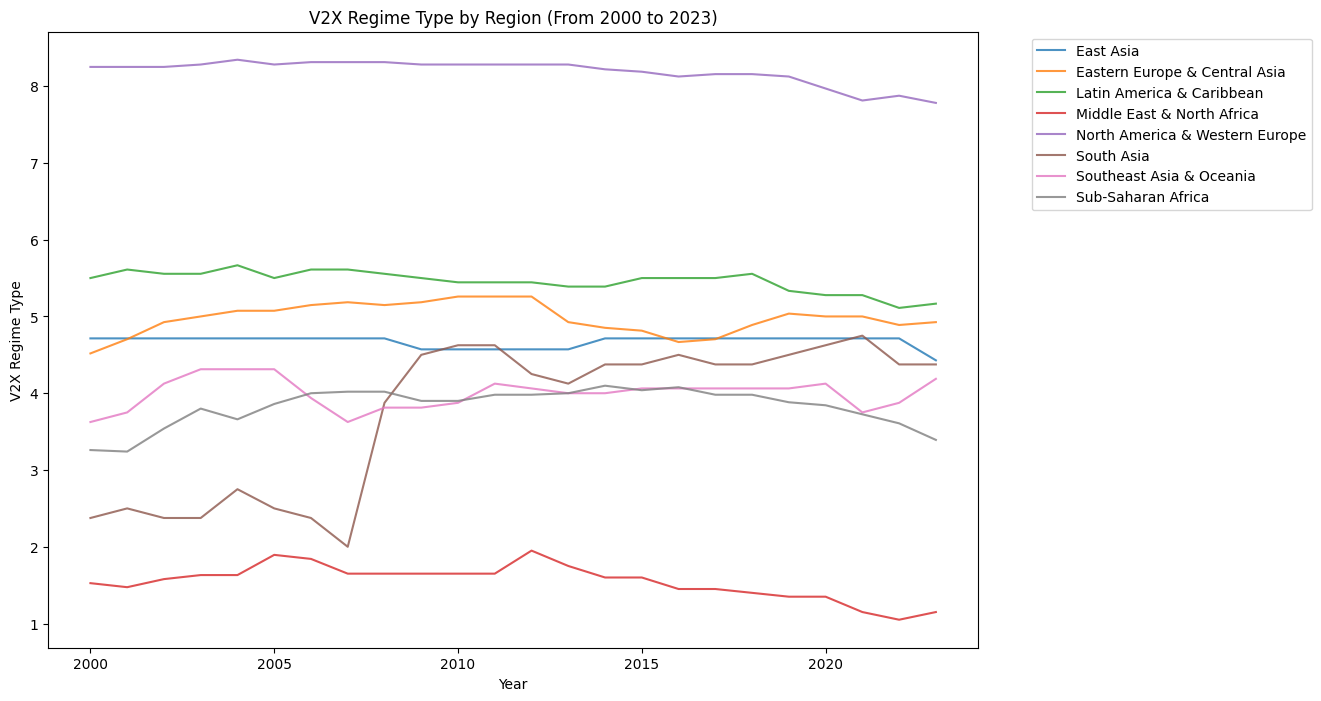

In [ ]:
Compzb = Compzf[Compzf['year'] >= 2000]
region_avg_regime = Compzb.groupby(['region', 'year'])['v2x_regime_amb'].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 8))

for region, data in region_avg_regime.groupby('region'):
    ax.plot(data['year'], data['v2x_regime_amb'], label=region, alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('V2X Regime Type')
ax.set_title('V2X Regime Type by Region (From 2000 to 2023)')

ax.legend(loc='best',bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
Comp_descending = Comp.sort_values(by = ['v2x_regime_amb'], ascending=False)
Comp_descending_2023 = Comp_descending[Comp_descending['year'] == 2023]
Comp_descending_2023.head(30)

year              country_name  v2x_regime_amb
14754  2023                     Spain             9.0
23012  2023                Luxembourg             9.0
21343  2023                   Denmark             9.0
23756  2023               New Zealand             9.0
1300   2023                     Japan             9.0
12870  2023                    Latvia             9.0
11872  2023                   Germany             9.0
25370  2023                Seychelles             9.0
7267   2023                    Taiwan             9.0
11088  2023                Costa Rica             9.0
21523  2023                   Estonia             9.0
12551  2023                   Ireland             9.0
593    2023                    Sweden             9.0
21862  2023                   Finland             9.0
14026  2023               Netherlands             9.0
21108  2023                   Czechia             9.0
22436  2023                   Iceland             9.0
10207  2023                 Australia             9.0
3159   2023  United States of America             9.0
819    2023               Switzerland             9.0
20336  2023                   Belgium             9.0
15597  2023            United Kingdom             8.0
15796  2023                   Uruguay             8.0
6668   2023               South Korea             8.0
23991  2023                    Norway             8.0
20135  2023                  Barbados             8.0
12714  2023                     Italy             8.0
10902  2023                     Chile             8.0
358    2023                  Suriname             8.0
11641  2023                    France             8.0

In [ ]:
Comp_ascending = Comp.sort_values(by = ['v2x_regime_amb'], ascending=True)
Comp_ascending_2023 = Comp_ascending[Comp_ascending['year'] == 2023]
Comp_ascending_2023.head(35)

year          country_name  v2x_regime_amb
16313  2023                  Chad             0.0
14395  2023                 Qatar             0.0
14858  2023                 Syria             0.0
16548  2023                 China             0.0
17255  2023               Eritrea             0.0
9545   2023                Guinea             0.0
13793  2023               Morocco             0.0
12342  2023                  Iran             0.0
12816  2023                Jordan             0.0
24226  2023                  Oman             0.0
22312  2023             Hong Kong             0.0
25900  2023  United Arab Emirates             0.0
25030  2023          Saudi Arabia             0.0
18773  2023               Somalia             0.0
19021  2023              Eswatini             0.0
18117  2023                 Libya             0.0
17967  2023                  Laos             0.0
20878  2023                  Cuba             0.0
19399  2023        Palestine/Gaza             0.0
20011  2023               Bahrain             0.0
4158   2023                 Haiti             0.0
8189   2023          Burkina Faso             0.0
5525   2023           Afghanistan             0.0
6433   2023           North Korea             0.0
4468   2023                  Mali             0.0
5116   2023               Vietnam             0.0
4913   2023           South Sudan             0.0
5037   2023                 Sudan             0.0
2285   2023                 Yemen             0.0
1535   2023         Burma/Myanmar             0.0
22747  2023                Kuwait             1.0
19321  2023          Turkmenistan             1.0
19658  2023            Uzbekistan             1.0
9082   2023             Nicaragua             2.0
17651  2023         Guinea-Bissau             3.0

In [ ]:
df_2023 = df[df['year'] == 2023]
df_2023.head()

country_name  country_id  year  COWcode  v2x_polyarchy  \
234       Mexico           3  2023     70.0          0.534   
358     Suriname           4  2023    115.0          0.753   
593       Sweden           5  2023    380.0          0.884   
819  Switzerland           6  2023    225.0          0.890   
941        Ghana           7  2023    452.0          0.661   

     v2x_polyarchy_codelow  v2x_polyarchy_codehigh  v2x_polyarchy_sd  \
234                  0.477                   0.599             0.060   
358                  0.702                   0.815             0.060   
593                  0.850                   0.927             0.040   
819                  0.858                   0.934             0.042   
941                  0.584                   0.716             0.066   

     v2x_libdem  v2x_libdem_codelow  ...  e_miurbani  e_pefeliex  e_wb_pop  \
234       0.299               0.256  ...         NaN         NaN       NaN   
358       0.631               0.576  ...         NaN         NaN       NaN   
593       0.852               0.812  ...         NaN         NaN       NaN   
819       0.844               0.802  ...         NaN         NaN       NaN   
941       0.562               0.496  ...         NaN         NaN       NaN   

     e_pechmor  e_miinteco  e_civil_war  e_miinterc  e_pt_coup  \
234        NaN         NaN          NaN         NaN        NaN   
358        NaN         NaN          NaN         NaN        NaN   
593        NaN         NaN          NaN         NaN        NaN   
819        NaN         NaN          NaN         NaN        NaN   
941        NaN         NaN          NaN         NaN        NaN   

     e_pt_coup_attempts                          region  
234                 NaN       Latin America & Caribbean  
358                 NaN       Latin America & Caribbean  
593                 NaN  North America & Western Europe  
819                 NaN  North America & Western Europe  
941                 NaN              Sub-Saharan Africa  

[5 rows x 4590 columns]

The code below identifies every index and the formula used in calculating the Regimes of the World formula. Because Indices are made up of indicators it would mess with clearly finding what the proper indicators of democracy are. Similarly, deleting the indicators in the formula prevents interference and multicollinearity.

In [ ]:
Every_Index = [ "v2x_polyarchy", "v2x_libdem", "v2x_partipdem", "v2x_delibdem", "v2x_egaldem", "v2x_api", "v2x_mpi", "v2x_freexp_altinf", "v2x_frassoc_thick", "v2x_suffr", "v2xel_frefair", "v2x_elecoff", "v2x_liberal", "v2xcl_rol", "v2x_jucon", "v2xlg_legcon", "v2x_partip", "v2x_cspart", "v2xdd_dd", "v2xel_locelec", "v2xel_regelec", "v2xdl_delib", "v2x_egal", "v2xeg_eqprotec", "v2xeg_eqaccess", "v2xeg_eqdr", "v2x_accountability", "v2x_veracc", "v2x_diagacc", "v2x_horacc", "v2x_ex_confidence", "v2x_ex_direlect", "v2x_ex_hereditary", "v2x_ex_military", "v2x_ex_party", "v2x_neopat", "v2xnp_client", "v2xnp_pres", "v2xnp_regcorr", "v2x_civlib", "v2x_clphy", "v2x_clpol", "v2x_clpriv", "v2xpe_exlecon", "v2xpe_exlgender", "v2xpe_exlgeo", "v2xpe_exlpol", "v2xpe_exlsocgr", "v2x_corr", "v2x_execorr", "v2x_pubcorr", "v2x_gender", "v2x_gencl", "v2x_gencs", "v2x_genpp", "v2x_rule", "v2xcl_acjst", "v2xcl_prpty", "v2xdd_i_ci", "v2xdd_i_rf", "v2xdd_i_or", "v2xdd_i_pl", "v2xdd_cic", "v2xdd_toc", "v2xcs_ccsi", "v2x_elecreg", "v2xex_elecreg", "v2xlg_elecreg", "v2x_EDcomp_thick", "v2xme_altinf", "v2xps_party", "v2x_divparctrl", "v2x_feduni", "v2xca_academ", "v2xpas_democracy", "v2xpas_democracy_government", "v2xpas_democracy_opposition", "v2xpas_religion", "v2xpas_religion_government", "v2xpas_religion_opposition", "v2xpas_exclusion", "v2xpas_exclusion_government", "v2xpas_exclusion_opposition", "v2xpas_economic", "v2xpas_economic_government", "v2xpas_economic_opposition", "e_v2x_api", "e_v2x_civlib", "e_v2x_clphy", "e_v2x_clpol", "e_v2x_clpriv", "e_v2x_corr", "e_v2x_cspart", "e_v2x_delibdem", "e_v2x_EDcomp_thick", "e_v2x_egal", "e_v2x_egaldem", "e_v2x_elecoff", "e_v2x_execorr", "e_v2x_feduni", "e_v2x_frassoc_thick", "e_v2x_freexp", "e_v2x_freexp_altinf", "e_v2x_gencl", "e_v2x_gencs", "e_v2x_gender", "e_v2x_genpp", "e_v2x_jucon", "e_v2x_libdem", "e_v2x_liberal", "e_v2x_mpi", "e_v2x_partip", "e_v2x_partipdem", "e_v2x_polyarchy", "e_v2x_pubcorr", "e_v2x_suffr", "e_v2xcl_rol", "e_v2xcs_ccsi", "e_v2xdd_dd", "e_v2xdl_delib", "e_v2xeg_eqdr", "e_v2xeg_eqprotec", "e_v2xel_frefair", "e_v2xel_locelec", "e_v2xel_regelec", "e_v2xlg_legcon", "e_v2xme_altinf", "e_v2xps_party", "e_boix_regime", "e_democracy_breakdowns", "e_democracy_omitteddata", "e_democracy_trans", "e_fh_cl", "e_fh_pr", "e_fh_rol", "e_fh_status", "e_wbgi_cce", "e_wbgi_gee", "e_wbgi_pve", "e_wbgi_rle", "e_wbgi_rqe", "e_wbgi_vae", "e_lexical_index", "e_uds", "e_autoc", "e_democ", "e_p_polity", "e_polcomp", "e_polity2", "e_bnr_dem", "e_chga_demo", "e_ti_cpi", "e_vanhanen" ]

In [ ]:
Regime_Formula = ['year', 'V2elmulpar_osp_ex',  'v2elmulpar_osp_leg', 'v2elmulpar_osp',  'v2elfrfair_osp',  'v2elfrfair_osp_leg', 'v2elfrfair_osp_ex',  'v2expathhg', 'v2expathhs',  'v2ex_legconhos', 'v2ex_hosw',  'v2clacjstm_osp', 'v2clacjstw_osp',  'v2cltrnslw_osp']

Because Regimes of the world is an ordinal scale where, generally, 4 and below is autocratic and 5 and above is democratic, that is how I sorted the column for the analysis.

In [ ]:
df_2023['v2x_regime_amb'].value_counts()
df_2023.loc[df['v2x_regime_amb'] < 5, 'v2x_regime_amb'] = 0
df_2023.loc[df['v2x_regime_amb'] > 4, 'v2x_regime_amb'] = 1
df_2023['v2x_regime_amb'].value_counts()

v2x_regime_amb
1.0    91
0.0    88
Name: count, dtype: int64

The code below takes out any column present in the lists written above or any column contains the name of any of the columns listed above. A particularly rude awakening was finding out that the codebook and the dataset don't line up because some indicators were split into different columns which complicated things. I tried manually sorting things out for hours until I gave up and googled how to check for substrings in strings in a list and remove them.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

columns_to_drop = [col for col in df_2023.columns if any(substr in col for substr in Every_Index)]
df_2023_1 = df_2023.drop(columns=columns_to_drop)
columns_to_drop1 = [col for col in df_2023_1.columns if any(substr in col for substr in Regime_Formula)]
df_2023_1 = df_2023_1.drop(columns=columns_to_drop1)
#this code was adapted from https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas and https://www.geeksforgeeks.org/check-for-a-substring-in-a-pandas-dataframe-column/
df_2023_1 = df_2023_1.drop(columns=['country_name', 'v2x_regime'])


In [ ]:
df_2023_1.head()
df_2023_1.shape

(179, 4151)

This code deletes the null values

In [ ]:
null_counts = df_2023_1.isnull().sum()
print(null_counts)

country_id              0
COWcode                 5
v2eltype_0            131
v2eltype_1            131
v2eltype_2            131
                     ... 
e_civil_war           179
e_miinterc            179
e_pt_coup             179
e_pt_coup_attempts    179
region                  0
Length: 4151, dtype: int64


In [ ]:
df_2023_1 = df_2023_1.dropna(axis=1)
df_2023_1.shape

(179, 1882)

For the categorical columns in the dataset, only region made sense as a dummy variable, as the other three were names of stuff.

In [ ]:
df_2023_1 =df_2023_1.drop(columns=['v2exnamhos', 'v2extithos', 'v2exparhos'])
df_2023_1 = pd.get_dummies(df_2023_1, columns=['region'])

The dataset also has columns for stuff like standard deviation, mean, etc, so this drops that.

In [ ]:
Suffixes_to_drop = ['_codelow', '_codehigh', '_sd', '_mean', '_nr', '_osp', '_ord']

In [ ]:
columns_to_drop3 = [col for col in df_2023_1.columns if any(substr in col for substr in Suffixes_to_drop)]
df_2023_1 = df_2023_1.drop(columns=columns_to_drop3)

In [ ]:
df_2023_1.head()
df_2023_1.shape

(179, 246)

Creates the decision tree model and plots it with a max depth of 5.

In [ ]:
indep_vars = [i for i in df_2023_1.columns if i != 'v2x_regime_amb']
dep_var = 'v2x_regime_amb'
X = df_2023_1[indep_vars]
y = df_2023_1[dep_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeClassifier(max_depth=5, min_samples_split=20)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

fig = plt.figure(figsize = (20, 20))
tree.plot_tree(model, feature_names = X_train.columns,
              class_names = ["Autocracy", "Democracy"], filled = True)
plt.show()


0.9790209790209791
0.9444444444444444


Ran a logistic regression to verify that I wasn't crazy in getting very high test and training values.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Electoral Democracy Index

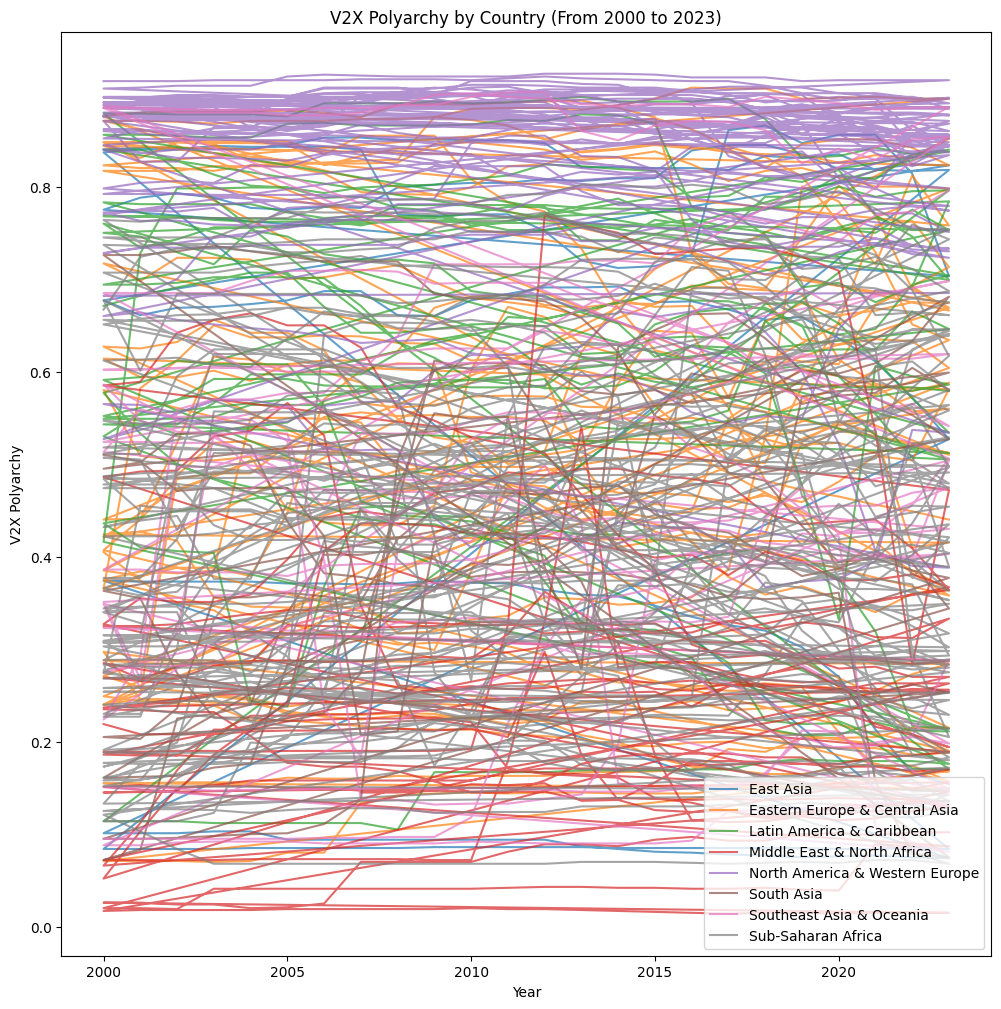

In [ ]:
Compaa = df[['year','region','v2x_polyarchy']]
Compab = Compaa[Compaa['year'] >= 2000]
Compab.head()

fig, ax = plt.subplots(figsize=(12, 12))

for country, data in Compab.groupby('region'):
    ax.plot(data['year'], data['v2x_polyarchy'], label=country, alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('V2X Polyarchy')
ax.set_title('V2X Polyarchy by Country (From 2000 to 2023)')
ax.legend(loc='best')
plt.show()
#while this looks incomprehensible, it is helpful in identifying volitilty by region
#NAWE is very stable at the top, while Latin America & The Caribbean are very volatile

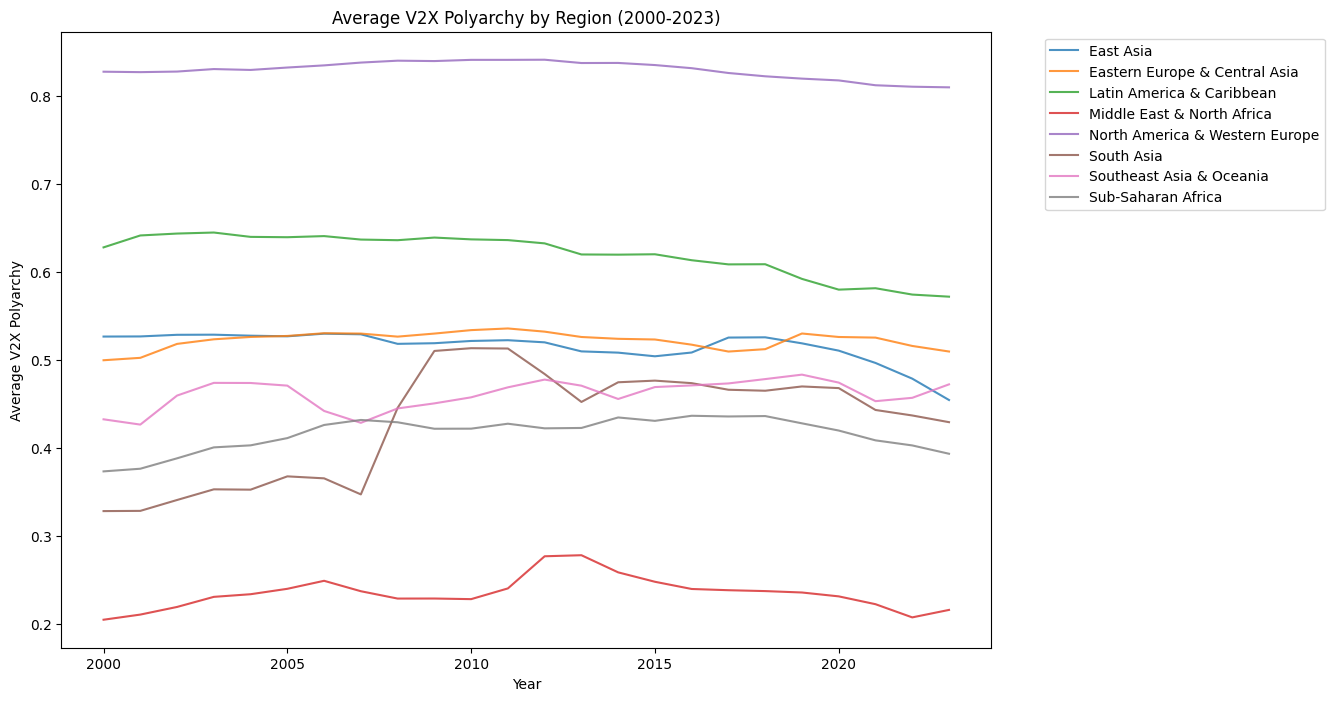

In [ ]:
Compaa = df[['year', 'region', 'v2x_polyarchy']]
Compab = Compaa[Compaa['year'] >= 2000]
region_avg = Compab.groupby(['region', 'year'])['v2x_polyarchy'].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 8))

for region, data in region_avg.groupby('region'):
    ax.plot(data['year'], data['v2x_polyarchy'], label=region, alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Average V2X Polyarchy')
ax.set_title('Average V2X Polyarchy by Region (2000-2023)')

ax.legend(loc='best',bbox_to_anchor=(1.05, 1))
#bbox_to_anchor learned through this link:https://www.statology.org/matplotlib-legend-position/
plt.show()

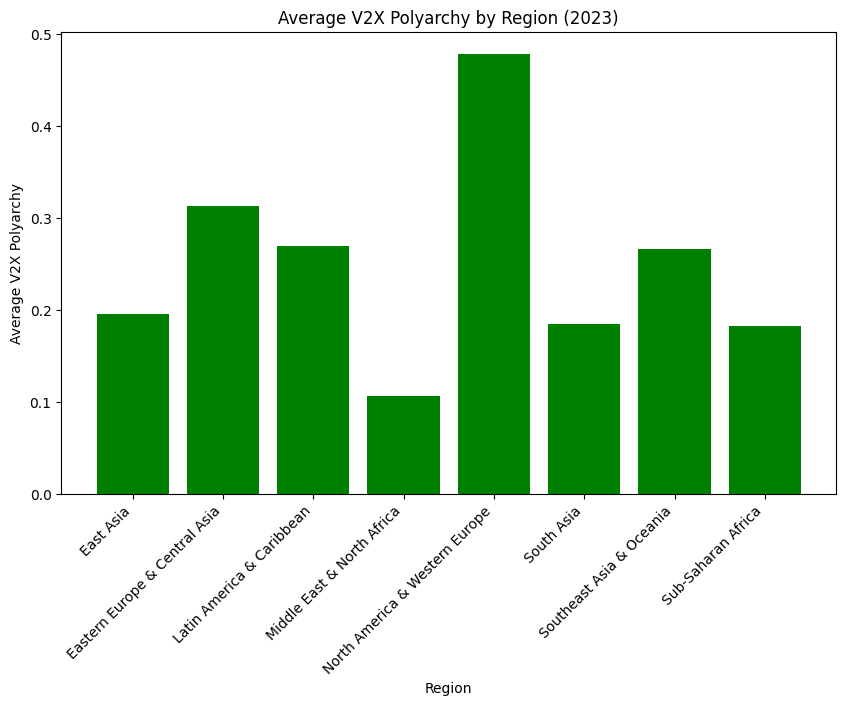

In [ ]:
Compac = df[df['year'] == 2023]

Compad = Compaa.groupby('region')['v2x_polyarchy'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(Compad.index, Compad.values, color='green')
ax.set_xlabel('Region')
ax.set_ylabel('Average V2X Polyarchy')
ax.set_title('Average V2X Polyarchy by Region (2023)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
Compba = df[['year', 'country_name', 'v2x_polyarchy']]
Compba_2023 = Compba[Compba['year'] == 2023]
fig, ax = plt.subplots(figsize=(8, 6))
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ax.hist(Compba_2023['v2x_polyarchy'], bins=bins, color='green', edgecolor='black')
#found the bins command through https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
#found the edgecolor command through: https://stackoverflow.com/questions/42741687/histogram-outlined-by-added-edgecolor
ax.set_xticks(bins)
#found the set_xticks command through: https://stackoverflow.com/questions/27083051/matplotlib-xticks-not-lining-up-with-histogram
ax.set_xlabel('V2X Polyarchy')
ax.set_ylabel('Number of Countries')
ax.set_title('Distribution of V2X Polyarchy (2023)')
plt.show()

In [ ]:
Compaa_country= df[['year', 'country_name', 'v2x_polyarchy']]
Compaa_descending = Compaa_country.sort_values(by = ['v2x_polyarchy'], ascending=False)
Compaa_descending_2023 = Compaa_descending[Compaa_descending['year'] == 2023]
Compaa_descending_2023.head(30)

year              country_name  v2x_polyarchy
21343  2023                   Denmark          0.915
12551  2023                   Ireland          0.896
21523  2023                   Estonia          0.895
20336  2023                   Belgium          0.895
819    2023               Switzerland          0.890
23756  2023               New Zealand          0.886
23991  2023                    Norway          0.886
593    2023                    Sweden          0.884
23012  2023                Luxembourg          0.878
11641  2023                    France          0.877
21108  2023                   Czechia          0.871
11088  2023                Costa Rica          0.868
21862  2023                   Finland          0.860
9972   2023                    Canada          0.856
11872  2023                   Germany          0.856
10207  2023                 Australia          0.854
14026  2023               Netherlands          0.854
12870  2023                    Latvia          0.852
15597  2023            United Kingdom          0.852
3159   2023  United States of America          0.848
3394   2023                  Portugal          0.845
15796  2023                   Uruguay          0.845
19887  2023                   Austria          0.844
14754  2023                     Spain          0.843
5760   2023                 Argentina          0.840
10902  2023                     Chile          0.838
12714  2023                     Italy          0.837
22436  2023                   Iceland          0.834
7267   2023                    Taiwan          0.823
25564  2023                  Slovakia          0.823

In [ ]:
Compaa_ascending = Compaa_country.sort_values(by = ['v2x_polyarchy'], ascending=True)
Compaa_ascending_2023 = Compaa_ascending[Compaa_ascending['year'] == 2023]
Compaa_ascending_2023.head(30)

year          country_name  v2x_polyarchy
25030  2023          Saudi Arabia          0.015
17255  2023               Eritrea          0.068
16548  2023                 China          0.074
5525   2023           Afghanistan          0.075
1535   2023         Burma/Myanmar          0.081
6433   2023           North Korea          0.084
14395  2023                 Qatar          0.087
25900  2023  United Arab Emirates          0.102
19021  2023              Eswatini          0.124
20011  2023               Bahrain          0.129
2285   2023                 Yemen          0.130
17967  2023                  Laos          0.132
5037   2023                 Sudan          0.135
19399  2023        Palestine/Gaza          0.136
4913   2023           South Sudan          0.143
14858  2023                 Syria          0.146
16313  2023                  Chad          0.148
5116   2023               Vietnam          0.149
19321  2023          Turkmenistan          0.150
22312  2023             Hong Kong          0.154
12342  2023                  Iran          0.156
16146  2023               Belarus          0.157
19055  2023            Tajikistan          0.168
9082   2023             Nicaragua          0.170
24226  2023                  Oman          0.170
18773  2023               Somalia          0.172
20878  2023                  Cuba          0.176
9545   2023                Guinea          0.180
21467  2023     Equatorial Guinea          0.183
10439  2023               Burundi          0.188

The next two models are the same thing with minor different that I will point out. For instant, different formula used here and v2x_polyarchy was substituted for v2x_regime in the Every_Index_1, as to not delete the y variable.

In [ ]:
Polyarchy_Formula = ['v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 'v2x_elecof']

In [ ]:
Every_Index_1 = [ "v2x_regime", "v2x_libdem", "v2x_partipdem", "v2x_delibdem", "v2x_egaldem", "v2x_api", "v2x_mpi", "v2x_freexp_altinf", "v2x_frassoc_thick", "v2x_suffr", "v2xel_frefair", "v2x_elecoff", "v2x_liberal", "v2xcl_rol", "v2x_jucon", "v2xlg_legcon", "v2x_partip", "v2x_cspart", "v2xdd_dd", "v2xel_locelec", "v2xel_regelec", "v2xdl_delib", "v2x_egal", "v2xeg_eqprotec", "v2xeg_eqaccess", "v2xeg_eqdr", "v2x_accountability", "v2x_veracc", "v2x_diagacc", "v2x_horacc", "v2x_ex_confidence", "v2x_ex_direlect", "v2x_ex_hereditary", "v2x_ex_military", "v2x_ex_party", "v2x_neopat", "v2xnp_client", "v2xnp_pres", "v2xnp_regcorr", "v2x_civlib", "v2x_clphy", "v2x_clpol", "v2x_clpriv", "v2xpe_exlecon", "v2xpe_exlgender", "v2xpe_exlgeo", "v2xpe_exlpol", "v2xpe_exlsocgr", "v2x_corr", "v2x_execorr", "v2x_pubcorr", "v2x_gender", "v2x_gencl", "v2x_gencs", "v2x_genpp", "v2x_rule", "v2xcl_acjst", "v2xcl_prpty", "v2xdd_i_ci", "v2xdd_i_rf", "v2xdd_i_or", "v2xdd_i_pl", "v2xdd_cic", "v2xdd_toc", "v2xcs_ccsi", "v2x_elecreg", "v2xex_elecreg", "v2xlg_elecreg", "v2x_EDcomp_thick", "v2xme_altinf", "v2xps_party", "v2x_divparctrl", "v2x_feduni", "v2xca_academ", "v2xpas_democracy", "v2xpas_democracy_government", "v2xpas_democracy_opposition", "v2xpas_religion", "v2xpas_religion_government", "v2xpas_religion_opposition", "v2xpas_exclusion", "v2xpas_exclusion_government", "v2xpas_exclusion_opposition", "v2xpas_economic", "v2xpas_economic_government", "v2xpas_economic_opposition", "e_v2x_api", "e_v2x_civlib", "e_v2x_clphy", "e_v2x_clpol", "e_v2x_clpriv", "e_v2x_corr", "e_v2x_cspart", "e_v2x_delibdem", "e_v2x_EDcomp_thick", "e_v2x_egal", "e_v2x_egaldem", "e_v2x_elecoff", "e_v2x_execorr", "e_v2x_feduni", "e_v2x_frassoc_thick", "e_v2x_freexp", "e_v2x_freexp_altinf", "e_v2x_gencl", "e_v2x_gencs", "e_v2x_gender", "e_v2x_genpp", "e_v2x_jucon", "e_v2x_libdem", "e_v2x_liberal", "e_v2x_mpi", "e_v2x_partip", "e_v2x_partipdem", "e_v2x_polyarchy", "e_v2x_pubcorr", "e_v2x_suffr", "e_v2xcl_rol", "e_v2xcs_ccsi", "e_v2xdd_dd", "e_v2xdl_delib", "e_v2xeg_eqdr", "e_v2xeg_eqprotec", "e_v2xel_frefair", "e_v2xel_locelec", "e_v2xel_regelec", "e_v2xlg_legcon", "e_v2xme_altinf", "e_v2xps_party", "e_boix_regime", "e_democracy_breakdowns", "e_democracy_omitteddata", "e_democracy_trans", "e_fh_cl", "e_fh_pr", "e_fh_rol", "e_fh_status", "e_wbgi_cce", "e_wbgi_gee", "e_wbgi_pve", "e_wbgi_rle", "e_wbgi_rqe", "e_wbgi_vae", "e_lexical_index", "e_uds", "e_autoc", "e_democ", "e_p_polity", "e_polcomp", "e_polity2", "e_bnr_dem", "e_chga_demo", "e_ti_cpi", "e_vanhanen" ]

While v2x_polyarchy isn't an ordinal variable like Regimes, I used the same strategy for designation of autocracy and democracy by roughly splitting it down the middle.

In [ ]:
df_2023['v2x_polyarchy'].value_counts()
df_2023.loc[df['v2x_polyarchy'] < .5, 'v2x_polyarchy'] = 0
df_2023.loc[df['v2x_polyarchy'] > .49, 'v2x_polyarchy'] = 1
df_2023['v2x_polyarchy'].value_counts()

v2x_polyarchy
1.0    94
0.0    85
Name: count, dtype: int64

In [ ]:
columns_to_drop4 = [col for col in df_2023.columns if any(substr in col for substr in Every_Index_1)]
df_2023_2 = df_2023.drop(columns=columns_to_drop4)
columns_to_drop5 = [col for col in df_2023_2.columns if any(substr in col for substr in Polyarchy_Formula)]
df_2023_2 = df_2023_2.drop(columns=columns_to_drop5)
#this code was adapted from https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas and https://www.geeksforgeeks.org/check-for-a-substring-in-a-pandas-dataframe-column/
df_2023_2 = df_2023_2.drop(columns=['country_name'])

In [ ]:
df_2023_2 = df_2023_2.dropna(axis=1)
df_2023_2.shape

(179, 1901)

In [ ]:
df_2023_2 =df_2023_2.drop(columns=['v2exnamhos', 'v2extithos', 'v2exparhos'])
df_2023_2 = pd.get_dummies(df_2023_2, columns=['region'])

In [ ]:
columns_to_drop6 = [col for col in df_2023_2.columns if any(substr in col for substr in Suffixes_to_drop)]
df_2023_2 = df_2023_2.drop(columns=columns_to_drop6)

In [ ]:
indep_vars = [i for i in df_2023_2.columns if i != 'v2x_polyarchy']
dep_var = 'v2x_polyarchy'
X = df_2023_2[indep_vars]
y = df_2023_2[dep_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeClassifier(max_depth=5, min_samples_split=20)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

fig = plt.figure(figsize = (20, 20))
tree.plot_tree(model, feature_names = X_train.columns,
              class_names = ["Autocracy", "Democracy"], filled = True)
plt.show()


0.9790209790209791
0.9166666666666666


Having only four columns here freaked me out, but after looking at the first node, I understand why there are too few. No political speech = autocratic. Especially with Western political scientists, freedom of speech is every thing. If you spoke to Eastern political scientists it would be different but VDEM is European through and through.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9444444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Liberal Component Index

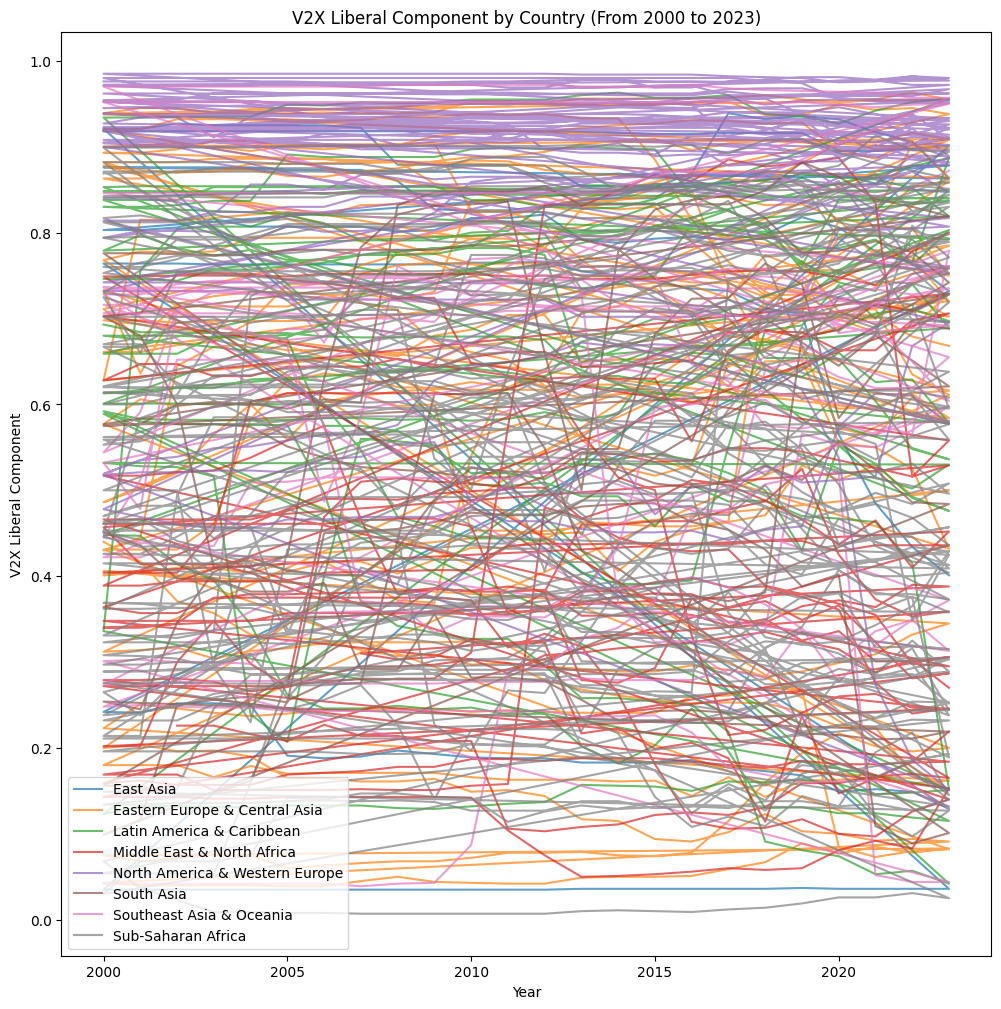

In [ ]:
Compaa = df[['year','region','v2x_liberal']]
Compab = Compaa[Compaa['year'] >= 2000]
Compab.head()

fig, ax = plt.subplots(figsize=(12, 12))

for country, data in Compab.groupby('region'):
    ax.plot(data['year'], data['v2x_liberal'], label=country, alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('V2X Liberal Component')
ax.set_title('V2X Liberal Component by Country (From 2000 to 2023)')
ax.legend(loc='best')
plt.show()
#NAWE is still very stable, while Eastern Europe and Central Asia are found to be generally more stable,
#LA&C and MENA are comparably more volitile

In [ ]:
Compaa = df[['year', 'region', 'v2x_liberal']]
Compab = Compaa[Compaa['year'] >= 2000]
region_avg = Compab.groupby(['region', 'year'])['v2x_liberal'].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 8))

for region, data in region_avg.groupby('region'):
    ax.plot(data['year'], data['v2x_liberal'], label=region, alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('V2X Liberal Component')
ax.set_title('V2X Liberal Component by Region (From 2000 to 2023)')

ax.legend(loc='best',bbox_to_anchor=(1.05, 1))
plt.show()

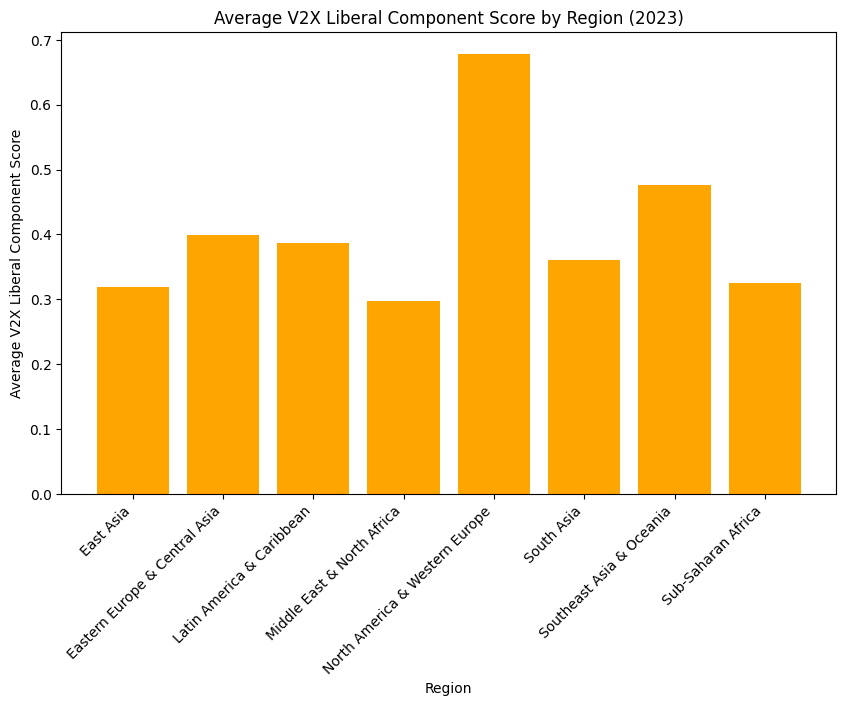

In [ ]:
Compac = df[df['year'] == 2023]

Compad = Compaa.groupby('region')['v2x_liberal'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(Compad.index, Compad.values, color='orange')
ax.set_xlabel('Region')
ax.set_ylabel('Average V2X Liberal Component Score')
ax.set_title('Average V2X Liberal Component Score by Region (2023)')
plt.xticks(rotation=45, ha='right')
plt.show()

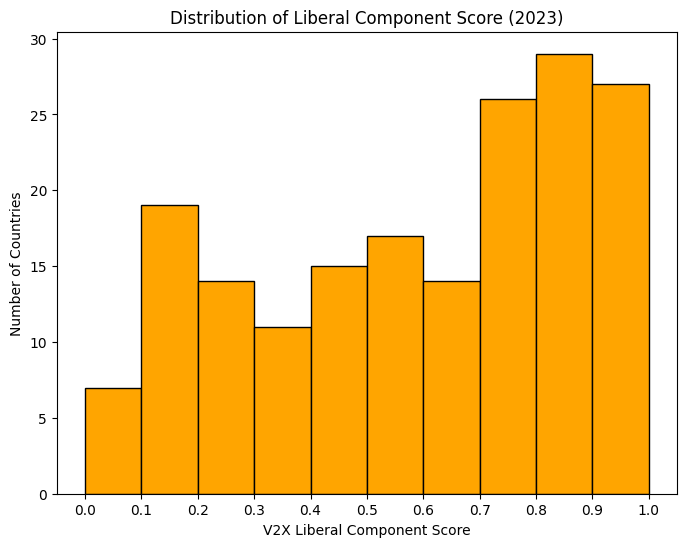

In [ ]:
Compba = df[['year', 'country_name', 'v2x_liberal']]
Compba_2023 = Compba[Compba['year'] == 2023]
fig, ax = plt.subplots(figsize=(8, 6))
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ax.hist(Compba_2023['v2x_liberal'], bins=bins, color='orange', edgecolor='black')
ax.set_xticks(bins)
ax.set_xlabel('V2X Liberal Component Score')
ax.set_ylabel('Number of Countries')
ax.set_title('Distribution of Liberal Component Score (2023)')
plt.show()

In [ ]:
Compll_country= df[['year', 'country_name', 'v2x_liberal']]
Compll_descending = Compll_country.sort_values(by = ['v2x_liberal'], ascending=False)
Compll_descending_2023 = Compll_descending[Compll_descending['year'] == 2023]
Compll_descending_2023.head(30)

year              country_name  v2x_liberal
593    2023                    Sweden        0.980
21343  2023                   Denmark        0.977
21862  2023                   Finland        0.972
11872  2023                   Germany        0.967
819    2023               Switzerland        0.962
10207  2023                 Australia        0.957
10902  2023                     Chile        0.956
21523  2023                   Estonia        0.955
23991  2023                    Norway        0.955
11088  2023                Costa Rica        0.953
14026  2023               Netherlands        0.951
23756  2023               New Zealand        0.950
22803  2023                 Lithuania        0.938
12551  2023                   Ireland        0.933
21108  2023                   Czechia        0.933
11641  2023                    France        0.930
19887  2023                   Austria        0.926
15796  2023                   Uruguay        0.922
3159   2023  United States of America        0.920
15597  2023            United Kingdom        0.914
12714  2023                     Italy        0.911
23012  2023                Luxembourg        0.910
20336  2023                   Belgium        0.909
25564  2023                  Slovakia        0.909
12870  2023                    Latvia        0.908
14754  2023                     Spain        0.902
1300   2023                     Japan        0.901
20514  2023                  Bulgaria        0.898
22436  2023                   Iceland        0.896
25370  2023                Seychelles        0.894

In [ ]:
Compll_ascending = Compll_country.sort_values(by = ['v2x_liberal'], ascending=True)
Compll_ascending_2023 = Compll_ascending[Compll_ascending['year'] == 2023]
Compll_ascending_2023.head(30)

year              country_name  v2x_liberal
17255  2023                   Eritrea        0.025
6433   2023               North Korea        0.036
9082   2023                 Nicaragua        0.042
1535   2023             Burma/Myanmar        0.044
16146  2023                   Belarus        0.082
19321  2023              Turkmenistan        0.083
19055  2023                Tajikistan        0.091
5525   2023               Afghanistan        0.101
7851   2023                 Venezuela        0.115
16313  2023                      Chad        0.127
16548  2023                     China        0.129
8313   2023                  Cambodia        0.130
5037   2023                     Sudan        0.132
2285   2023                     Yemen        0.140
21467  2023         Equatorial Guinea        0.140
10439  2023                   Burundi        0.145
1770   2023                    Russia        0.151
20878  2023                      Cuba        0.151
3580   2023               El Salvador        0.151
4158   2023                     Haiti        0.152
14858  2023                     Syria        0.153
16112  2023                Azerbaijan        0.162
20011  2023                   Bahrain        0.165
25030  2023              Saudi Arabia        0.184
10667  2023  Central African Republic        0.189
4913   2023               South Sudan        0.193
19658  2023                Uzbekistan        0.200
3724   2023                Bangladesh        0.219
19399  2023            Palestine/Gaza        0.219
20606  2023                   Comoros        0.232

In [ ]:
Liberal_Formula = ["v2xcl_rol", "v2x_jucon", "v2xlg_legcon", "v2lgbicam"]
Every_Index_2 = [ "v2x_polyarchy", "v2x_regime", "v2x_libdem", "v2x_partipdem", "v2x_delibdem", "v2x_egaldem", "v2x_api", "v2x_mpi", "v2x_freexp_altinf", "v2x_frassoc_thick", "v2x_suffr", "v2xel_frefair", "v2x_elecoff", "v2xcl_rol", "v2x_jucon", "v2xlg_legcon", "v2x_partip", "v2x_cspart", "v2xdd_dd", "v2xel_locelec", "v2xel_regelec", "v2xdl_delib", "v2x_egal", "v2xeg_eqprotec", "v2xeg_eqaccess", "v2xeg_eqdr", "v2x_accountability", "v2x_veracc", "v2x_diagacc", "v2x_horacc", "v2x_ex_confidence", "v2x_ex_direlect", "v2x_ex_hereditary", "v2x_ex_military", "v2x_ex_party", "v2x_neopat", "v2xnp_client", "v2xnp_pres", "v2xnp_regcorr", "v2x_civlib", "v2x_clphy", "v2x_clpol", "v2x_clpriv", "v2xpe_exlecon", "v2xpe_exlgender", "v2xpe_exlgeo", "v2xpe_exlpol", "v2xpe_exlsocgr", "v2x_corr", "v2x_execorr", "v2x_pubcorr", "v2x_gender", "v2x_gencl", "v2x_gencs", "v2x_genpp", "v2x_rule", "v2xcl_acjst", "v2xcl_prpty", "v2xdd_i_ci", "v2xdd_i_rf", "v2xdd_i_or", "v2xdd_i_pl", "v2xdd_cic", "v2xdd_toc", "v2xcs_ccsi", "v2x_elecreg", "v2xex_elecreg", "v2xlg_elecreg", "v2x_EDcomp_thick", "v2xme_altinf", "v2xps_party", "v2x_divparctrl", "v2x_feduni", "v2xca_academ", "v2xpas_democracy", "v2xpas_democracy_government", "v2xpas_democracy_opposition", "v2xpas_religion", "v2xpas_religion_government", "v2xpas_religion_opposition", "v2xpas_exclusion", "v2xpas_exclusion_government", "v2xpas_exclusion_opposition", "v2xpas_economic", "v2xpas_economic_government", "v2xpas_economic_opposition", "e_v2x_api", "e_v2x_civlib", "e_v2x_clphy", "e_v2x_clpol", "e_v2x_clpriv", "e_v2x_corr", "e_v2x_cspart", "e_v2x_delibdem", "e_v2x_EDcomp_thick", "e_v2x_egal", "e_v2x_egaldem", "e_v2x_elecoff", "e_v2x_execorr", "e_v2x_feduni", "e_v2x_frassoc_thick", "e_v2x_freexp", "e_v2x_freexp_altinf", "e_v2x_gencl", "e_v2x_gencs", "e_v2x_gender", "e_v2x_genpp", "e_v2x_jucon", "e_v2x_libdem", "e_v2x_liberal", "e_v2x_mpi", "e_v2x_partip", "e_v2x_partipdem", "e_v2x_polyarchy", "e_v2x_pubcorr", "e_v2x_suffr", "e_v2xcl_rol", "e_v2xcs_ccsi", "e_v2xdd_dd", "e_v2xdl_delib", "e_v2xeg_eqdr", "e_v2xeg_eqprotec", "e_v2xel_frefair", "e_v2xel_locelec", "e_v2xel_regelec", "e_v2xlg_legcon", "e_v2xme_altinf", "e_v2xps_party", "e_boix_regime", "e_democracy_breakdowns", "e_democracy_omitteddata", "e_democracy_trans", "e_fh_cl", "e_fh_pr", "e_fh_rol", "e_fh_status", "e_wbgi_cce", "e_wbgi_gee", "e_wbgi_pve", "e_wbgi_rle", "e_wbgi_rqe", "e_wbgi_vae", "e_lexical_index", "e_uds", "e_autoc", "e_democ", "e_p_polity", "e_polcomp", "e_polity2", "e_bnr_dem", "e_chga_demo", "e_ti_cpi", "e_vanhanen" ]

Same drill as last time, split it down the middle.

In [ ]:
df_2023['v2x_liberal'].value_counts()
df_2023.loc[df['v2x_liberal'] < .5, 'v2x_liberal'] = 0
df_2023.loc[df['v2x_liberal'] > .49, 'v2x_liberal'] = 1
df_2023['v2x_liberal'].value_counts()

v2x_liberal
1.0    114
0.0     65
Name: count, dtype: int64

In [ ]:
columns_to_drop7 = [col for col in df_2023.columns if any(substr in col for substr in Every_Index_2)]
df_2023_3 = df_2023.drop(columns=columns_to_drop7)
columns_to_drop8 = [col for col in df_2023_2.columns if any(substr in col for substr in Liberal_Formula)]
df_2023_3 = df_2023_3.drop(columns=columns_to_drop8)
#this code was adapted from https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas and https://www.geeksforgeeks.org/check-for-a-substring-in-a-pandas-dataframe-column/
df_2023_3 = df_2023_3.drop(columns=['country_name'])

In [ ]:
df_2023_3 = df_2023_3.dropna(axis=1)
df_2023_3.shape

(179, 1900)

In [ ]:
df_2023_3 =df_2023_3.drop(columns=['v2exnamhos', 'v2extithos', 'v2exparhos'])
df_2023_3 = pd.get_dummies(df_2023_3, columns=['region'])

In [ ]:
columns_to_drop9 = [col for col in df_2023_3.columns if any(substr in col for substr in Suffixes_to_drop)]
df_2023_3 = df_2023_3.drop(columns=columns_to_drop9)

1.0
0.8611111111111112


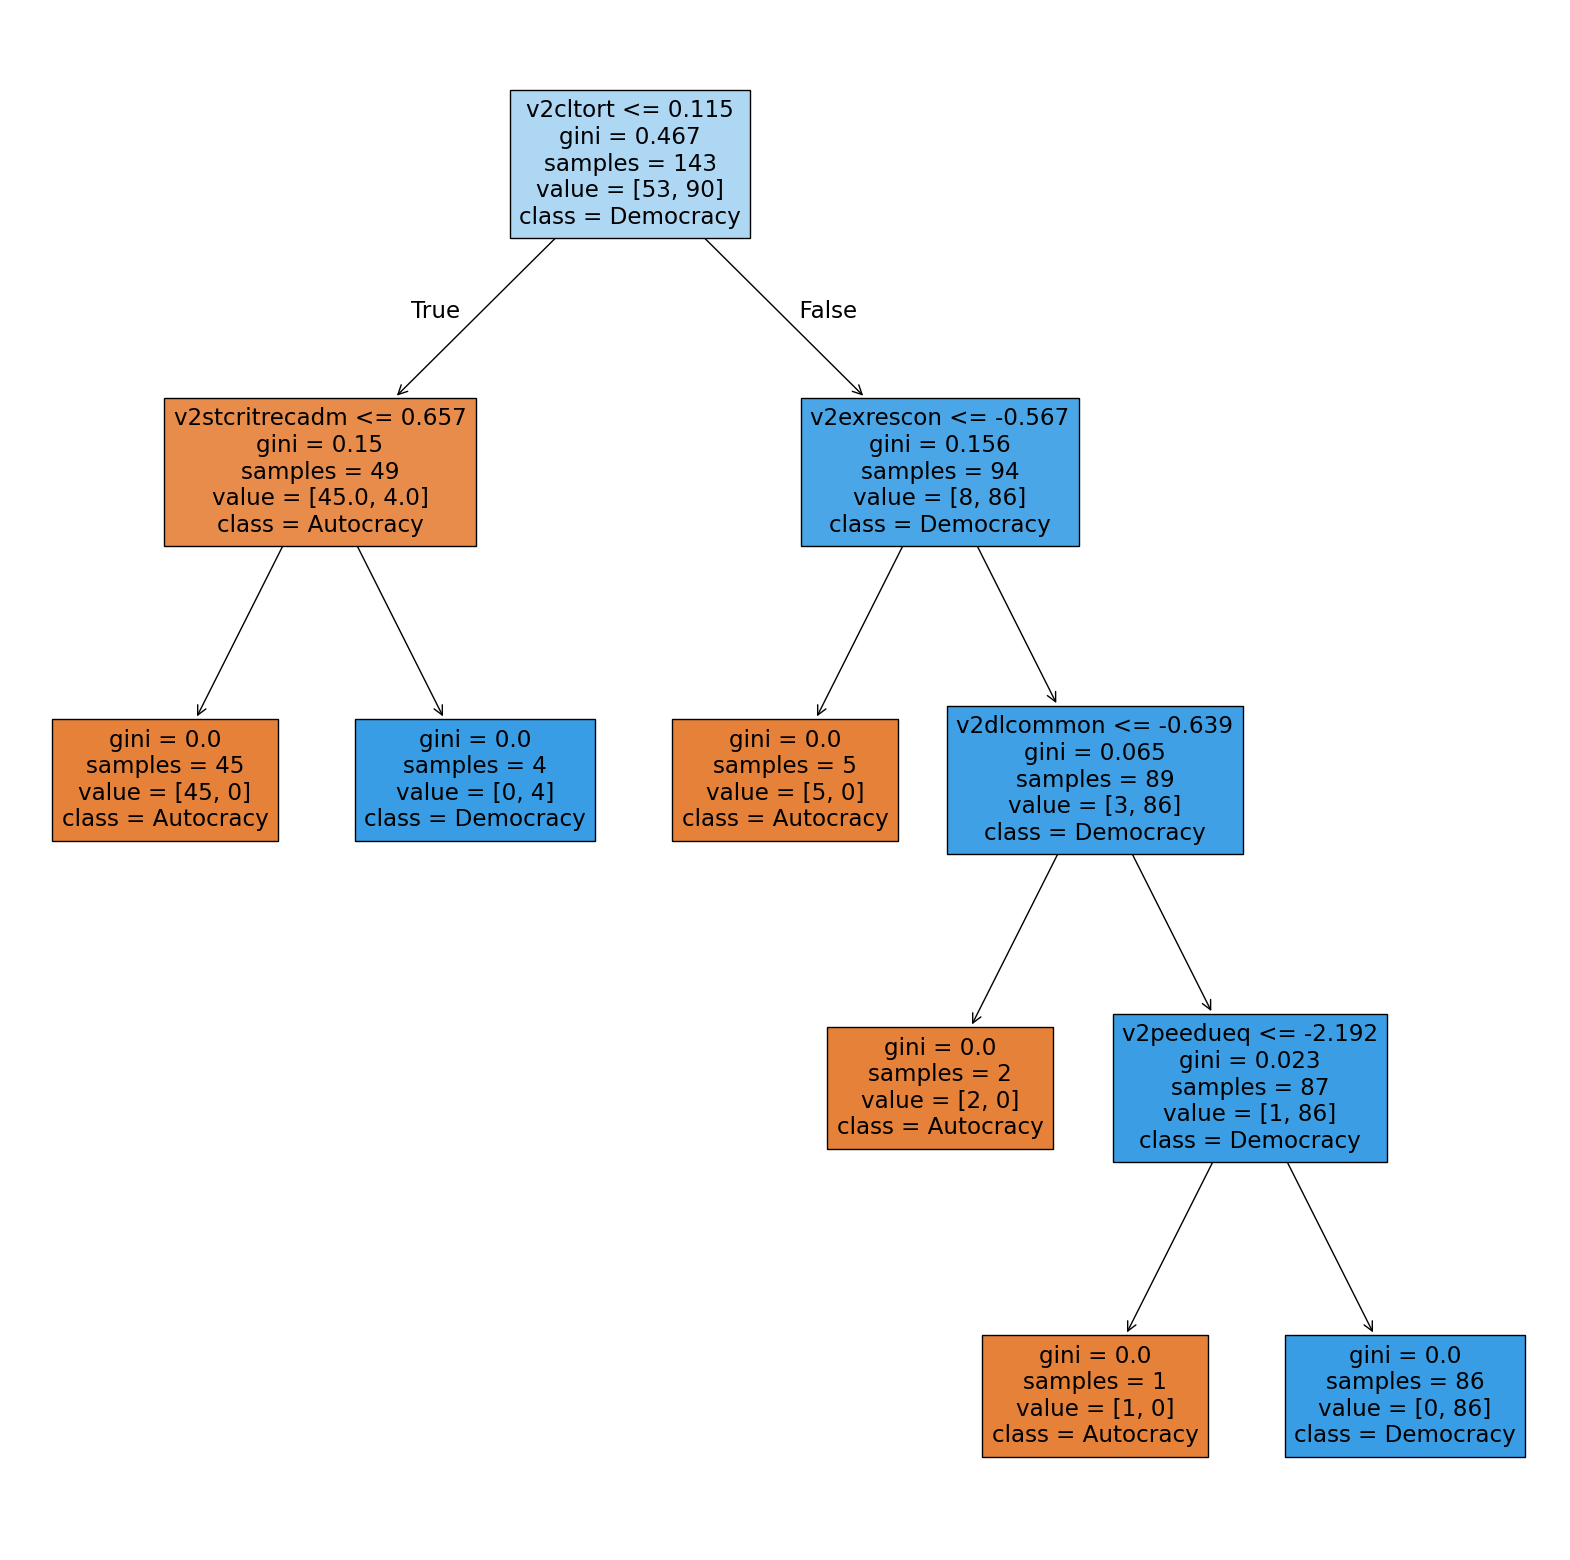

In [ ]:
indep_vars = [i for i in df_2023_3.columns if i != 'v2x_liberal']
dep_var = 'v2x_liberal'
X = df_2023_3[indep_vars]
y = df_2023_3[dep_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeClassifier(max_depth=5, min_samples_split=20)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

fig = plt.figure(figsize = (20, 20))
tree.plot_tree(model, feature_names = X_train.columns,
              class_names = ["Autocracy", "Democracy"], filled = True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8888888888888888


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#  Correlation between Electoral Democracy Index and Liberal Component Index


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
Compdf_2023 = df[df['year'] == 2023]

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(Compdf_2023['v2x_polyarchy'], Compdf_2023['v2x_liberal'], 'o', label=None, alpha=0.6)
ax.set_xlabel('V2X Polyarchy')
ax.set_ylabel('V2X Liberal')
ax.set_title('V2X Polyarchy vs V2X Liberal (2023)')
plt.show()
Compdf_2023[['v2x_polyarchy', 'v2x_liberal']].corr()

v2x_polyarchy  v2x_liberal
v2x_polyarchy       1.000000     0.915787
v2x_liberal         0.915787     1.000000

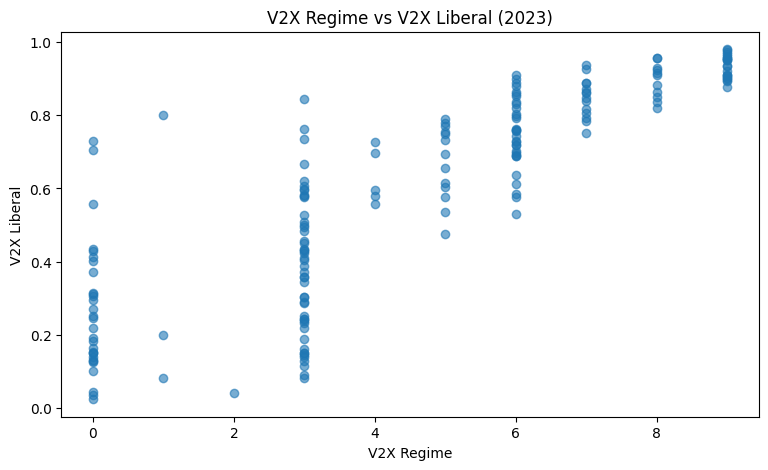

v2x_regime_amb  v2x_liberal
v2x_regime_amb        1.000000     0.844127
v2x_liberal           0.844127     1.000000

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(Compdf_2023['v2x_regime_amb'], Compdf_2023['v2x_liberal'], 'o', label=None, alpha=0.6)
ax.set_xlabel('V2X Regime')
ax.set_ylabel('V2X Liberal')
ax.set_title('V2X Regime vs V2X Liberal (2023)')
plt.show()
Compdf_2023[['v2x_regime_amb', 'v2x_liberal']].corr()

# Is there a statistically significant difference between regions in democratic values?

In [ ]:
from scipy.stats import f_oneway


NAWE = df.loc[(df["region"]=="North America & Western Europe") & (df["year"]==2023), 'v2x_liberal']
SSA = df.loc[(df["region"]=="Sub-Saharan Africa") & (df["year"]==2023), 'v2x_liberal']
SAO = df.loc[(df["region"]=="Southeast Asia & Oceania") & (df["year"]==2023), 'v2x_liberal']
EA = df.loc[(df["region"]=="East Asia") & (df["year"]==2023), 'v2x_liberal']
SA = df.loc[(df["region"]=="South Asia") & (df["year"]==2023), 'v2x_liberal']
MENA = df.loc[(df["region"]=="Middle East & North Africa") & (df["year"]==2023), 'v2x_liberal']
LAC = df.loc[(df["region"]=="Latin America & Caribbean") & (df["year"]==2023), 'v2x_liberal']
EECA = df.loc[(df["region"]=="Eastern Europe & Central Asia") & (df["year"]==2023), 'v2x_liberal']


f_oneway(NAWE, SSA, SAO, EA, SA, MENA, LAC, EECA)

F_onewayResult(statistic=8.658095652469672, pvalue=4.4190782998094845e-09)

In [ ]:
from scipy.stats import f_oneway


NAWE = df.loc[(df["region"]=="North America & Western Europe") & (df["year"]==2023), 'v2x_polyarchy']
SSA = df.loc[(df["region"]=="Sub-Saharan Africa") & (df["year"]==2023), 'v2x_polyarchy']
SAO = df.loc[(df["region"]=="Southeast Asia & Oceania") & (df["year"]==2023), 'v2x_polyarchy']
EA = df.loc[(df["region"]=="East Asia") & (df["year"]==2023), 'v2x_polyarchy']
SA = df.loc[(df["region"]=="South Asia") & (df["year"]==2023), 'v2x_polyarchy']
MENA = df.loc[(df["region"]=="Middle East & North Africa") & (df["year"]==2023), 'v2x_polyarchy']
LAC = df.loc[(df["region"]=="Latin America & Caribbean") & (df["year"]==2023), 'v2x_polyarchy']
EECA = df.loc[(df["region"]=="Eastern Europe & Central Asia") & (df["year"]==2023), 'v2x_polyarchy']


f_oneway(NAWE, SSA, SAO, EA, SA, MENA, LAC, EECA)

F_onewayResult(statistic=19.792071866586262, pvalue=2.7375076040341775e-19)

# Issues with Dataset

In [ ]:
lo_ascending = df.sort_values(by = ['v2elprescons'], ascending=True)
lo_ascending_2023 = lo_ascending[lo_ascending['year'] == 2023]
lo_ascending_2023['v2elprescons']

17255     0.0
17369     0.0
16044     0.0
16548     0.0
16313     0.0
         ... 
11641    22.0
11088    22.0
11406    23.0
3159     31.0
2520     33.0
Name: v2elprescons, Length: 179, dtype: float64

In [ ]:
uk_data = df[(df['country_name'] == 'United Kingdom')]
print(uk_data[['year', 'v2elprescons']])

       year  v2elprescons
15363  1789           NaN
15364  1790           NaN
15365  1791           NaN
15366  1792           NaN
15367  1793           NaN
...     ...           ...
15593  2019           0.0
15594  2020           0.0
15595  2021           0.0
15596  2022           0.0
15597  2023           0.0

[235 rows x 2 columns]


In [ ]:
lp_ascending = df.sort_values(by = ['v2elprescumul'], ascending=True)
lp_ascending_2023 = lp_ascending[lp_ascending['year'] == 2023]
lp_ascending_2023['v2elprescumul']

17255     0.0
15597     0.0
16548     0.0
19021     0.0
17775     0.0
         ... 
3159     31.0
11088    32.0
2520     33.0
12107    37.0
11406    40.0
Name: v2elprescumul, Length: 179, dtype: float64

In [ ]:
uk_data1 = df[(df['country_name'] == 'United Kingdom')]
print(uk_data[['year', 'v2elprescumul']])

       year  v2elprescumul
15363  1789            NaN
15364  1790            NaN
15365  1791            NaN
15366  1792            NaN
15367  1793            NaN
...     ...            ...
15593  2019            0.0
15594  2020            0.0
15595  2021            0.0
15596  2022            0.0
15597  2023            0.0

[235 rows x 2 columns]


In [ ]:
Null_2023 = df[df['year'] == 2023]
Null_Everything = Null_2023.isnull().sum()
Null_Everything1 = Null_Everything.sort_values(ascending=False)
print(Null_Everything1)

v2juflow                   179
v3exnamhos                 179
v3eltype_1                 179
v3eltype_2                 179
v3eltype_3                 179
                          ... 
v2clprptyw_osp_codehigh      0
v2clprptyw_osp_sd            0
v2clprptyw_ord               0
v2clprptyw_ord_codelow       0
region                       0
Length: 4590, dtype: int64


In [ ]:
us_data = Null_2023[Null_2023['country_name'] == 'United States of America']
us_nulls = us_data.isnull().sum().sort_values(ascending=False)
print(us_nulls)

v2exremhog_sd          1
v3elecsedf_osp_sd      1
v3elcomvot_codehigh    1
v3elcomvot_codelow     1
v3elcomvot             1
                      ..
v2clsnlpct_sd          0
v2clsnlpct_mean        0
v2clsnlpct_nr          0
v2clrgstch_0           0
region                 0
Length: 4590, dtype: int64


In [ ]:
us_nulls_total = us_data.isnull().sum().sum()
print(us_nulls_total)

1245


In [ ]:
Russia_data = Null_2023[Null_2023['country_name'] == 'Russia']
Russia_nulls = Russia_data.isnull().sum().sort_values(ascending=False)
print(Russia_nulls)

v3struinvadm_osp_codehigh    1
v3lglegpup_osp_codehigh      1
v3lglegpup_nr                1
v3lglegpup_mean              1
v3lglegpup_ord_codehigh      1
                            ..
v2cltrnslw_codehigh          0
v2cltrnslw_sd                0
v2cltrnslw_osp               0
v2cltrnslw_osp_codelow       0
region                       0
Length: 4590, dtype: int64


In [ ]:
Russia_nulls_total = Russia_data.isnull().sum().sum()
print(Russia_nulls_total)

1107
